In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import warnings
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
import category_encoders as ce
from kneed import KneeLocator
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# Define the problem.
- our goal is to make prediction on whether the customer will open a bank deposit or not.


In [4]:
df = pd.read_csv('bank.csv')
df_c = df.copy()
df 


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


Data Cleaning: 
- Delete Column that has Single value 
- Remove columns that has very low variance 
- Remove Duplicate Data 
- Imputate Missing data (N/A, NaN, unknown, 999)

In [5]:
df.info()
## WE can see that there is missing values.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
if df.duplicated().any() == 0:
    print("no")


no


In [7]:
df.isnull().sum()
# we can see that there is no missing values.


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Lets look at each of the features and explain them  

What is this dataset about?  
This dataset is called the bank Marketting dataset that is commonly used to analyze customers behaviours and improve marketing strategies.

This bank marketing comes from a real world Portugese banking institute and contains the information from their marketing campaigns. The features can be categorise into 3 parts 

- Client information: Demographic and basic data about the client ( age, job, marital, status and education)
- Campaingn Information: Details of the marketing campaign ( number of contacts, the outcome of previous contacts)

Purpose of the Dataset is : 
- Improve Campaign Efficiency: Identify which types of clients are more likely to subscribe, allowing for targeted marketing.
- Enhance Customer: Understand which factors contribute to a positive response to marketing thereby 

age(numeric) =   age of the participants.  
job(categorical:11) =   The type of jobs and profession the participants have.  
marital_status(categorical) =   The marital status of participants.  
education(categorical) =   maximum education level of each.  
default(Binary) =   Did they default in credit card or not.  
housing(Binary) =   Do they have housing loan or not.
loan(Binary) =   Do they have personal loan or not.  
Balance(Numeric) =   their current account balance.  



contact(Binary)(categorical: 'cellular','telephone') = contact communocation type. 
month( Jan- Dec)(Categorical) = Last contact of the month of the year. 
day(Mon-Sunday)(Categorical) = Last contact day with the customer.
duration(Numeric) = Last contact duration about the campaign. 



In [8]:
## statistical description of each numeric feature
# -Age. Distict value is 76, which shows wide range of different values, age is likely spread accross different groups,
#    rather then tightly clustered

# Mean(41) is closer to median(39). As mean is higher which means right skew. std is 12, means there is moderate spread.

# Percentiles: Tells us the distribution.  25th 32. 25% of the client is less than 32. 
## Inference: if the mean and median is around 40, we see that the main focus of the campaign is around 40 yrs.



# -


Rather than indepth analysis, we are going to have more generalised overview of the dataset.
- Distict value of ageis 76, which shows wide range of different values, age is likely spread accross different groups,rather then tightly clustered
- Mean(41) is closer to median(39). As mean is higher which means right skew. std is 12, means there is moderate spread.

By job
- Management is the most common job, with 23%, then blue collar 17% and technician 16%.
- from teens to 60s, there is consistent involvement in admin, around 11% in each decile.
- For blue collar there is a steady increase of involvement, around 20%, with 3% increment in each decile, upto 50s. After 50s we see rapid decrement and there there is no one from 70. Blue collar job is associated with phyisical capabilities and we see this as normal.
- 


# Handling Null values 
- We are going to see if there is any null values in any of the feature.
- If there is no null values, we look for (N/A, NaN, 999), if we find them we have to transform them by pandas.
- after that we did conditional imputation with 4 of them, and now we dont have any missing values.


In [9]:
# Calculate the number of null values in each column

## but lets look at if there is any unknown value ? 
unknown =  (df == 'unknown').sum()
unknown
df.replace("unknown", np.nan, inplace=True) 
# replace unknown by NaN , pandas can recongnize it 



null_counts = df.isnull().sum()

# # Iterate over the counts and check if they are zero or not
# for col, count in null_counts.items():
#     if count != 0:
#         print(f"{col} --> {count} --> Not ok")
null_counts

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

As you can see even if there was no null values, there were 'unknown' values. These are disguised null values, which were not detected by the pandas library. So I had to rename those null values to NaN values, so that the nan values can be treated.


# Imputation 
- Here we can see that we have to perform imputation, as it is categorical, we might go it mode imputation.
- But that is too straightforward and it will populate the the gaps with (incorrect) values.
- We are going to do conditional imputation,
- We identify the class that we have to impute,
- We indentify the conditions that is most influential in determining the classes.
- So we use that conditions to impute with the synthetic values, 
- that way the imputation is more robust.


In [10]:
## we see that there are lots of unknown value, but now we have to handle them.

df['job'].unique()


## using conditional imputation 
df ['job'] = np.where(
    (df['job'].isna())& (df['age']>50) & (df['housing'] == 'no') & (df['loan'] == 'no'), "retired",
    np.where(
        (df['job'].isna())& (df['age']<=50) & (df['balance'] <=1000), 'unemployed',
        np.where(
            (df['job'].isna())& (df['balance']>=1000),'self-employed',
            np.where(
                (df['job'].isna())& (df['age']<35) & (df['marital']== 'single'), 'student',
                df['job']
            ) 
        )
    )   
)
print(df.isnull().sum())
## the job missing values are imputated
## lets analyze the job NaN value, and see how can we deal with it.
## why do you think they reported job as missing. lets see.


## if the feature has more the 35% of missing value, drop them, cannot handle that much







## Now lets look at the contact feature 

# even though by partitioning the telephone and cellular, the demographics remains same 
# So contact type does not depend on demographics, 10% telephone, 70% cell, 20% missing.

# at any range , we see that the % of missing contact is always around 20%
# and the percenatage of using a contact stays altogether at 80%
# as the age range increases by 10%, we see that the the %of ppl using cell decrease by 1. and telephone increases by 1.

# blue collar = 35% missing in contact
# and retired ppl have higher % of telephone 22% as opposed to 10% of the whole population





age             0
job             0
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64


In [11]:
##  Now lets look at the education feature.
df['education'].unique()

# Conditional imputation based on observed characteristics
df['education'] = np.where(
    (df['education'].isna()) & (df['age'] > 50) & (df['housing'] == 'no') & (df['loan'] == 'no'), 'primary',
    np.where(
        (df['education'].isna()) & (df['balance'] > 1800), 'tertiary',
        np.where(
            (df['education'].isna()) & (df['age'] <= 50) & (df['balance'] <= 1800), 'secondary',
            df['education']  # Keeps original value if none of the conditions are met
        )
    )
)
df['education'].fillna("secondary", inplace=True)
# Check for any remaining missing values in 'education'
print(df.isnull().sum())  # Should return 0 if all missing values are imputed


age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64


In [12]:
# Check for any remaining missing values in 'contact'
print(df.isnull().sum())  # Should return 0 if all missing values are imputed

## lets drop the poutcome column
df.drop(columns=['poutcome'],inplace = True)

## Understand why having a higher % of missing values, demands the removal of the whole feauture.
#- explanation in chat gpt , learn it 

# # Imputation is Unreliable: There aren’t enough non-missing values to impute accurately.
# Weak Correlation with Target: The feature doesn’t strongly correlate with the target variable, indicating it doesn’t add predictive power.
# Other Features Serve as Proxies: Other features capture similar information, reducing the need for the missing-heavy feature.
######--- do this in this code block and show that dropping the feature was the best option.

print(df.isnull().sum())

## Dealt with all the missing values.

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64
age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
deposit         0
dtype: int64


In [13]:
# ## lets analyze the job NaN value, and see how can we deal with it.
# ## why do you think they reported job as missing. lets see.
# df['job'].unique()
# Refined imputation for 'contact' based on observed patterns
df['contact'] = np.where(
    (df['contact'].isna()) & (df['job'] == 'retired'), 'telephone',  # Assign 'telephone' to retired individuals
    np.where(
        (df['contact'].isna()), 'cellular',  # Default to 'cellular' for others
        df['contact']  # Keep original value if 'contact' is not missing
    )
)

print(df.isnull().sum())

## Dealt with all the missing values.

## if the feature has more the 35% of missing value, drop them, cannot handle that much

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64


In [14]:
## using conditional imputaion to fill up the missing values 
# - the median age is  46.5 , which means they are well past their early carer age, so as they are missing
#   the status might be unemployed, retired , or self-employed 

# - higher % of unknown education could be fewer formal education, given the age range suggest they are old ppl
# - they dont have (97%) of them any loans. this could mean, no loans were approved for them, could be financially unstaable.

# Consider a Conditional Imputation:

# --Replace "unknown" with "retired" for those older than a certain threshold (e.g., over 50) and with lower credit activity.
# --Assign "unemployed" to those younger or with lower bank balances.
# --Use "self-employed" for those with higher balances and no education information.

In [15]:
# Lets look for duplicate data, 
tot_duplicate = df.duplicated().sum()

if tot_duplicate == 0:
    print('There is no duplicate observasions. All observations are unique')
else:
    print("Duplicate removal necessary")



There is no duplicate observasions. All observations are unique


# Outlier detection and removal

In [16]:
## Now lets look at the ouliers for each of the numeric feature

## Lets see how many numeric feautures are there.\

num_df = df.select_dtypes(include = ['int64'])  ## show me df with numeric cols

col_count = df.select_dtypes(include = ['int64']).count() ##  numeric features only

numeric_cols = df.select_dtypes(include = ['int64']).columns
len(numeric_cols)

print(f"The number of numeric features are {len(numeric_cols)} and the features are\n{col_count} ")

The number of numeric features are 7 and the features are
age         11162
balance     11162
day         11162
duration    11162
campaign    11162
pdays       11162
previous    11162
dtype: int64 


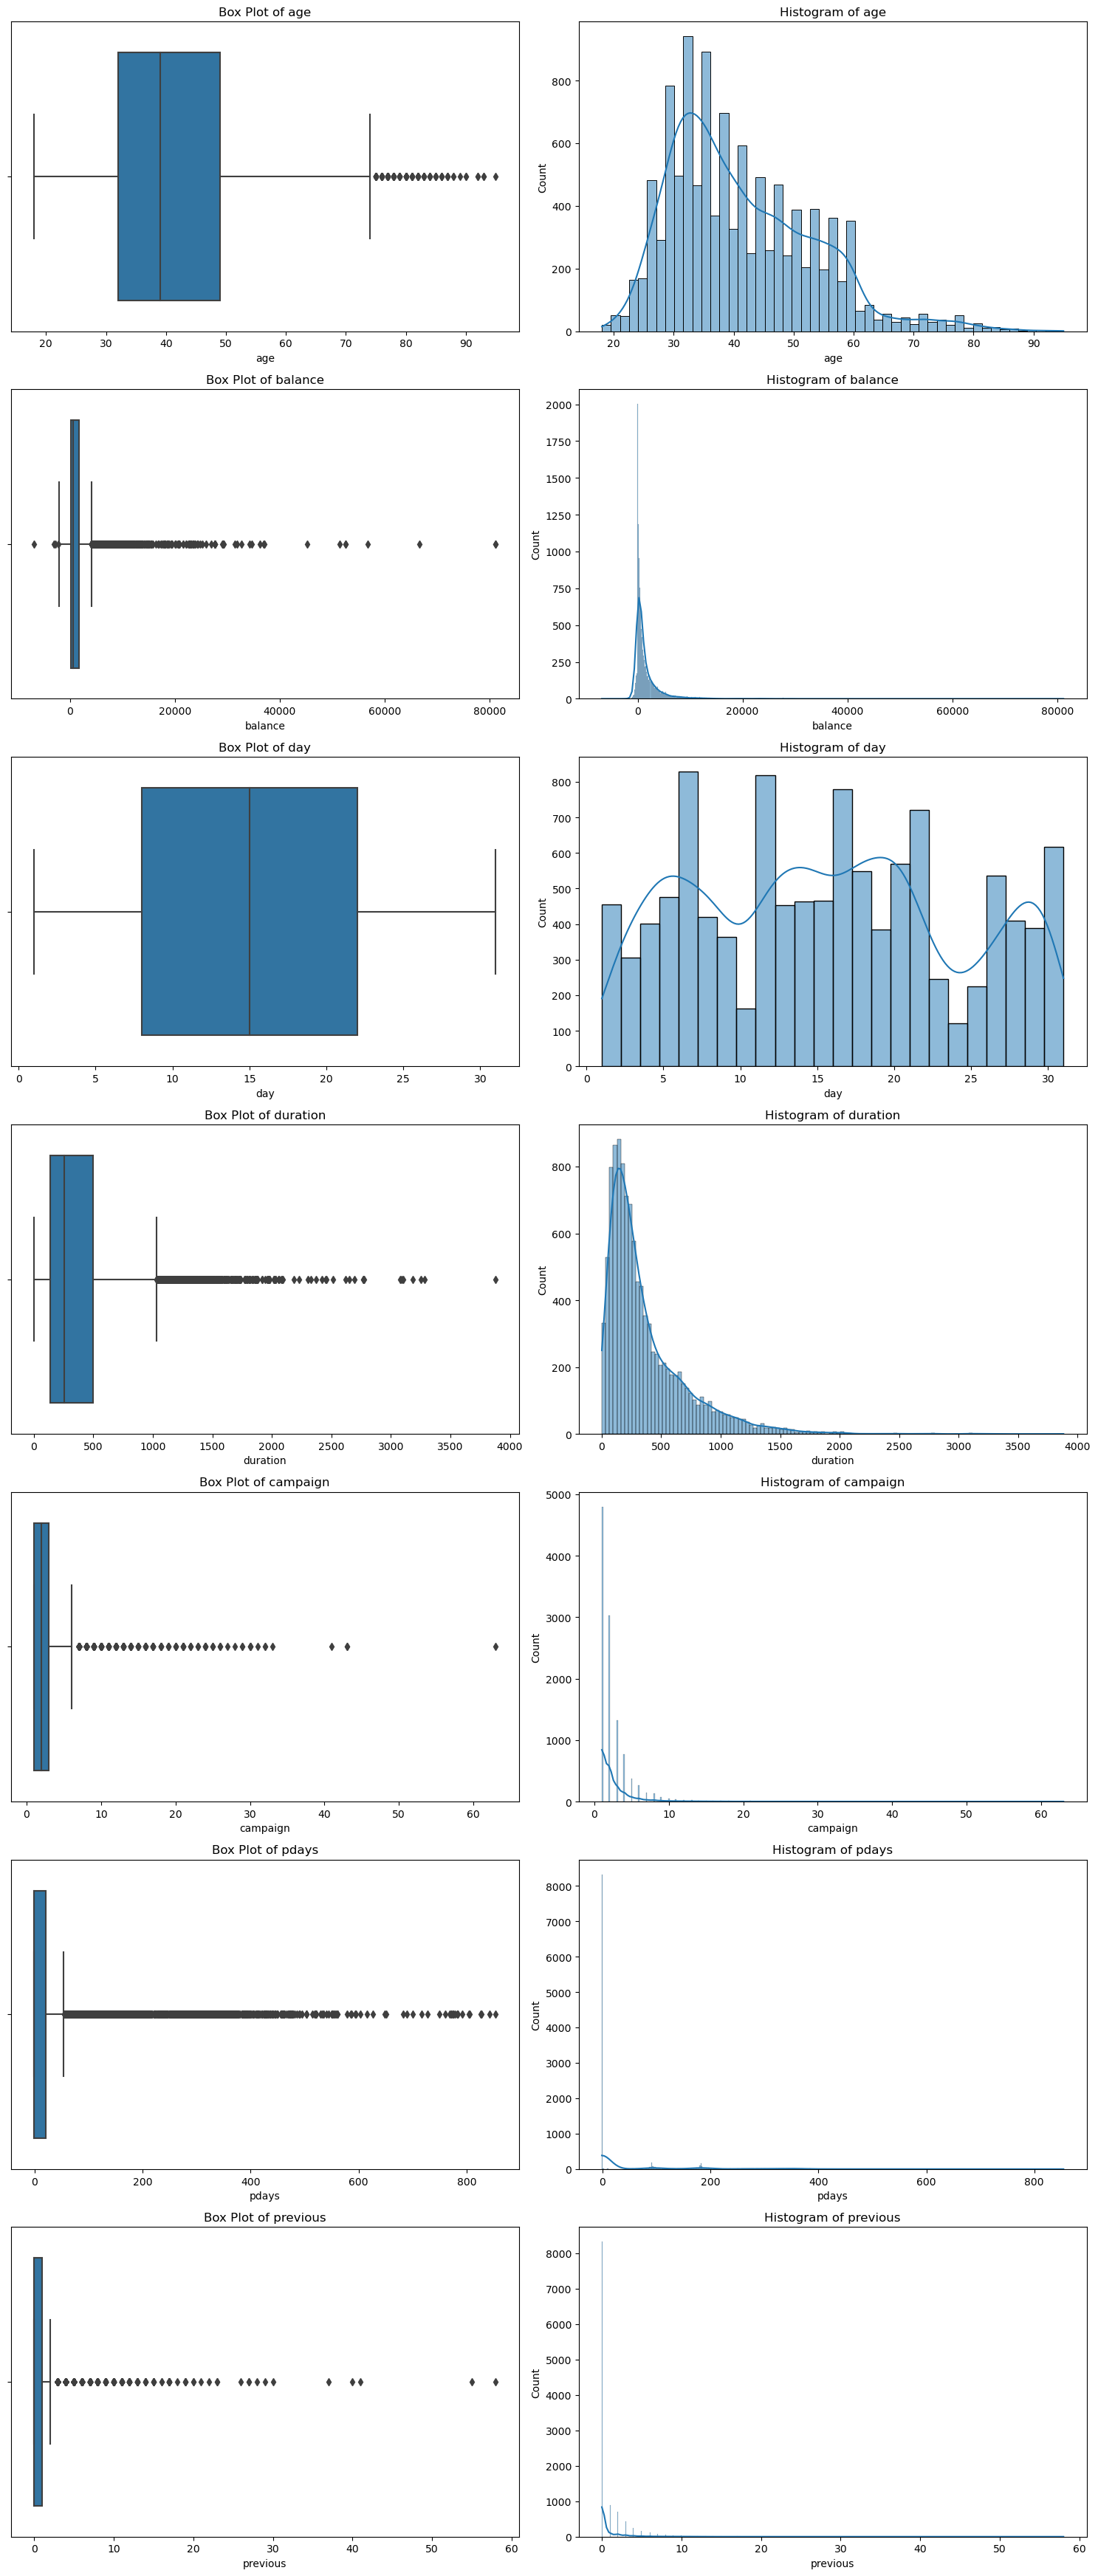

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select only numeric columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the matplotlib figure for multiple subplots (2 rows for each feature)
plt.figure(figsize=(15, 5 * len(numeric_features)))

# Loop through each numeric feature and create both a box plot and histogram
for i, feature in enumerate(numeric_features, 1):
    # Box plot
    plt.subplot(len(numeric_features), 2, 2 * i - 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')

    # Histogram
    plt.subplot(len(numeric_features), 2, 2 * i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [18]:
## None of them are normally distributed. So we are going to remove outlier by IQR.

# Define columns to remove outliers using IQR
columns = ['age','campaign']

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    up_bound = Q3 + 1.5 * IQR
    low_bound = Q1 - 1.5 * IQR
    
    # Filter the DataFrame for the current column
    df = df[(df[col] >= low_bound) & (df[col] <= up_bound)]

# Display the cleaned DataFrame
df



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,cellular,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,no,45,no,no,cellular,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,cellular,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,cellular,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,cellular,5,may,673,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,no
11158,39,services,married,secondary,no,733,no,no,cellular,16,jun,83,4,-1,0,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,no


In [19]:
## Winsorization of balance and duration 
from scipy.stats.mstats import winsorize

lower_limit = 0.01  # Lower 1% of values
upper_limit = 0.01  # Upper 1% of values

# Apply Winsorization and replace the original balance column using .loc
df.loc[:, 'balance'] = winsorize(df['balance'], limits=(lower_limit, upper_limit))
df.loc[:, 'duration'] = winsorize(df['duration'], limits=(lower_limit, upper_limit))

df

## Day is uniformly distributed, so we dont need to remove any outlier. 



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,cellular,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,no,45,no,no,cellular,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,cellular,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,cellular,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,cellular,5,may,673,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,no
11158,39,services,married,secondary,no,733,no,no,cellular,16,jun,83,4,-1,0,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,17,2,172,5,no


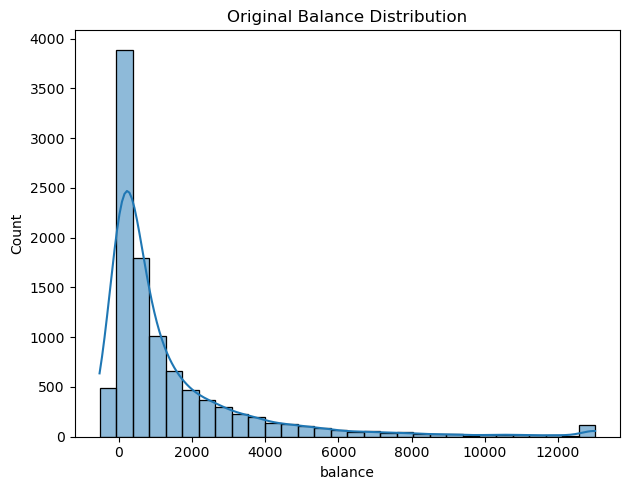

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting before and after Winsorization
plt.figure(figsize=(12, 5))

# Original balance distribution
plt.subplot(1, 2, 1)
sns.histplot(df['balance'], bins=30, kde=True)
plt.title("Original Balance Distribution")


plt.tight_layout()
plt.show()


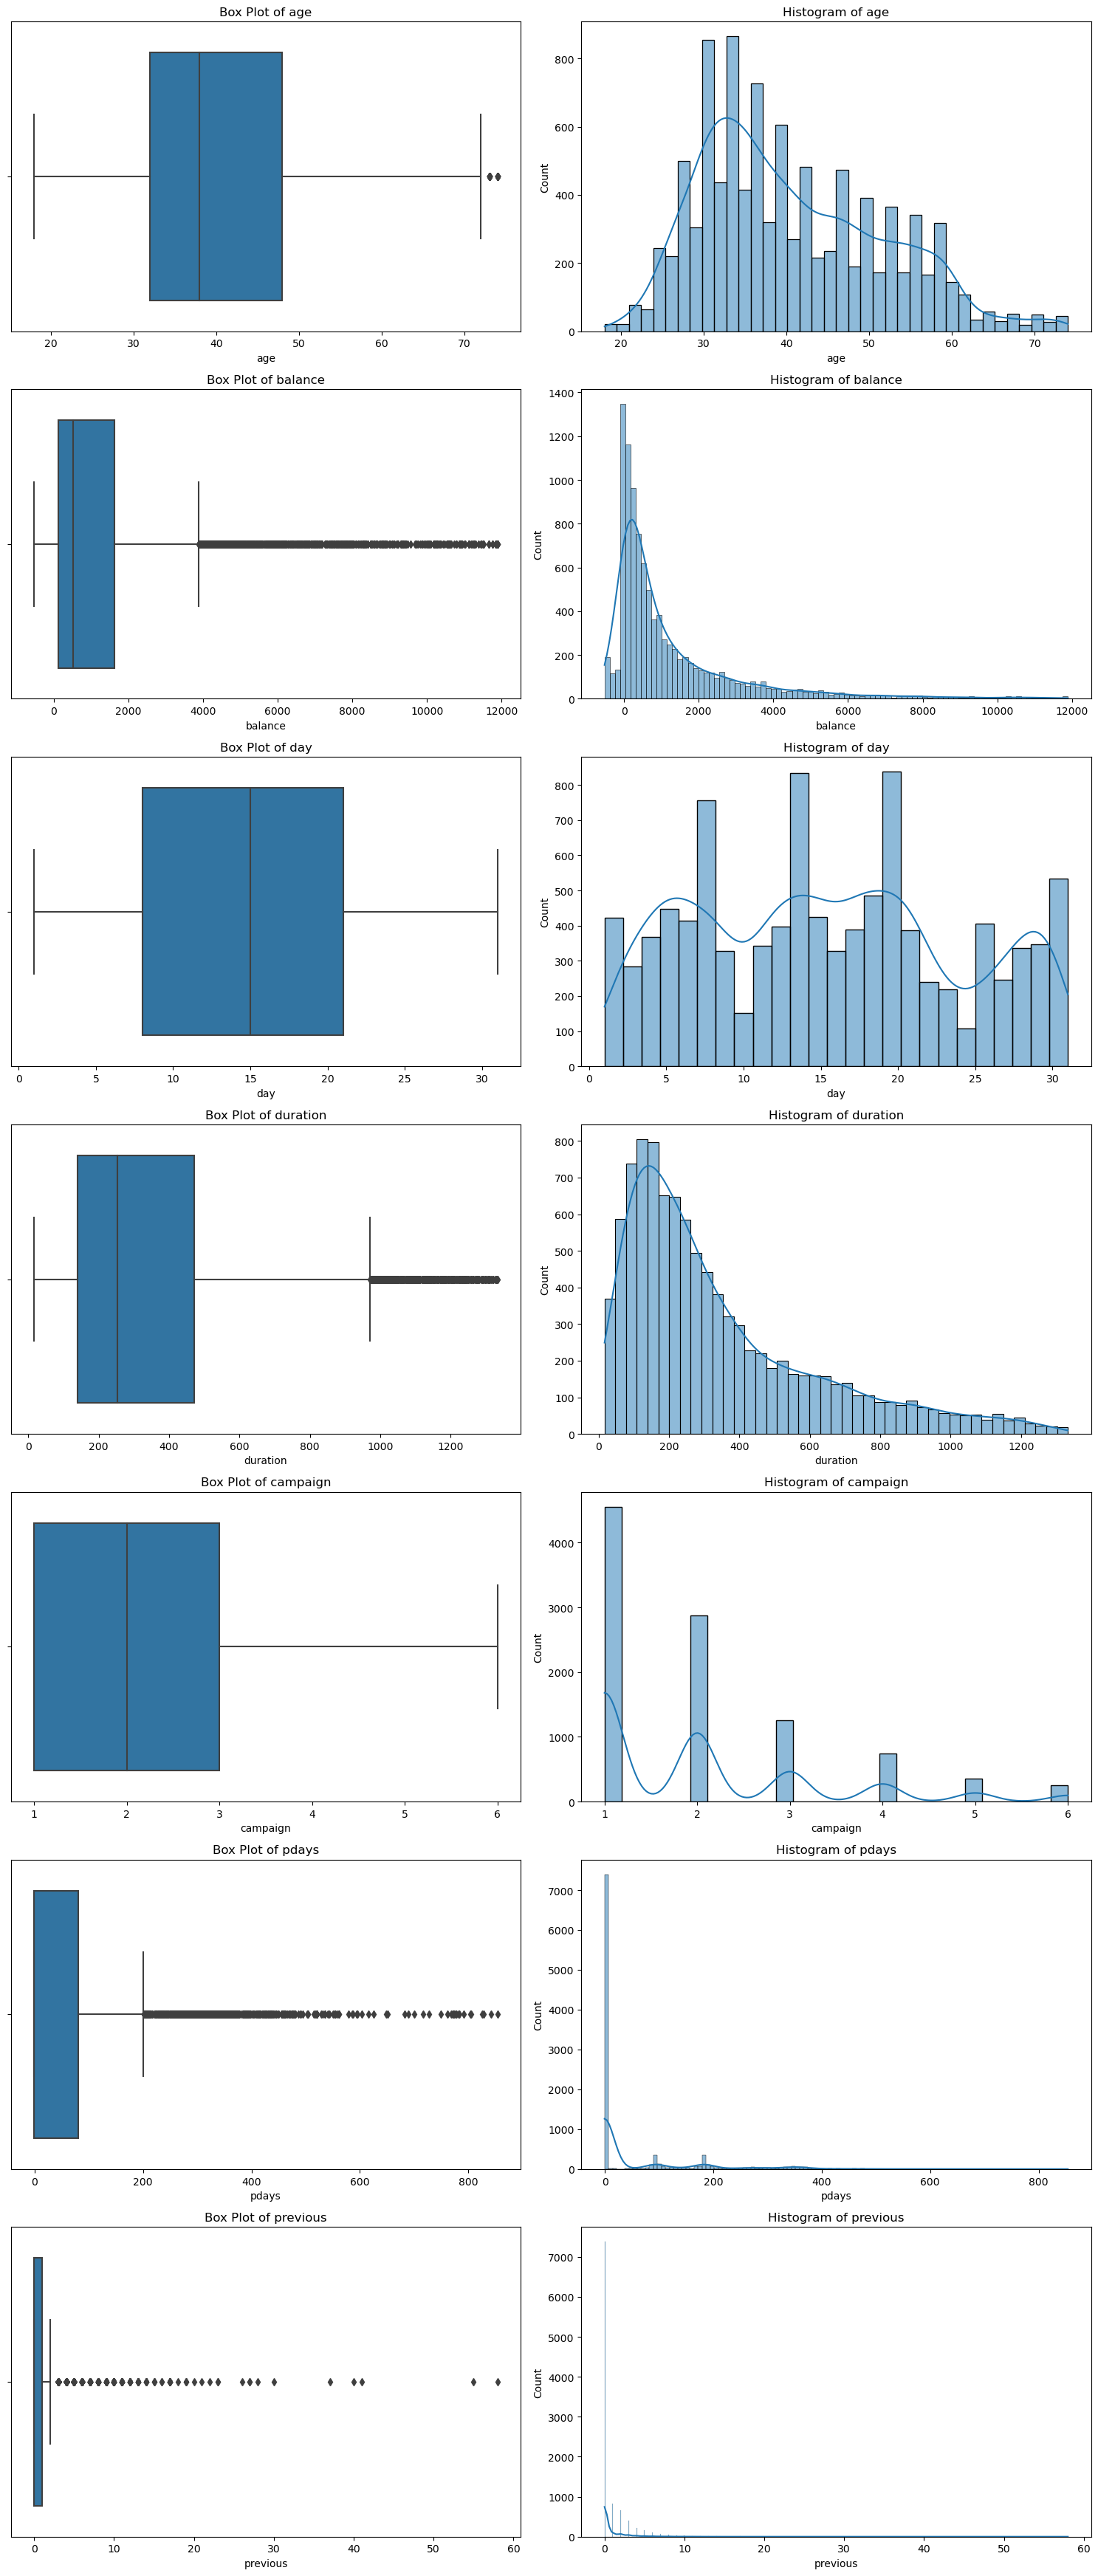

<class 'pandas.core.frame.DataFrame'>
Index: 10030 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10030 non-null  int64 
 1   job        10030 non-null  object
 2   marital    10030 non-null  object
 3   education  10030 non-null  object
 4   default    10030 non-null  object
 5   balance    10030 non-null  int64 
 6   housing    10030 non-null  object
 7   loan       10030 non-null  object
 8   contact    10030 non-null  object
 9   day        10030 non-null  int64 
 10  month      10030 non-null  object
 11  duration   10030 non-null  int64 
 12  campaign   10030 non-null  int64 
 13  pdays      10030 non-null  int64 
 14  previous   10030 non-null  int64 
 15  deposit    10030 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.3+ MB


In [21]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# remove the value in the duration column after 1535,
df = df[df['duration']<1334]
df = df[df['balance']<12000]


# Select only numeric columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the matplotlib figure for multiple subplots (2 rows for each feature)
plt.figure(figsize=(15, 5 * len(numeric_features)))

# Loop through each numeric feature and create both a box plot and histogram
for i, feature in enumerate(numeric_features, 1):
    # Box plot
    plt.subplot(len(numeric_features), 2, 2 * i - 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')

    # Histogram
    plt.subplot(len(numeric_features), 2, 2 * i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
df.info()

In [22]:
# job_perc = df['job'].value_counts(normalize = True)*100
# # value counts get the number of unique classes, and normalize return as proportion
# job_perc


# # Create age bins for every 10 years
# df['age_group'] = pd.cut(df['age'], bins=range(10, 101, 10), right=False, labels=[f"{i}s" for i in range(10, 100, 10)])

# # Calculate the job distribution within each age group
# job_distribution_by_age_group = df.groupby('age_group')['job'].value_counts(normalize=True).unstack() * 100

# # Display the distribution as percentages
# print(job_distribution_by_age_group

# ## row-wise, it sums up to 100. because it shows the distribution of all the jobs in that age range.
# ## but column wise mean nothing. the number are just for the row wise.


!pip install ptitprince



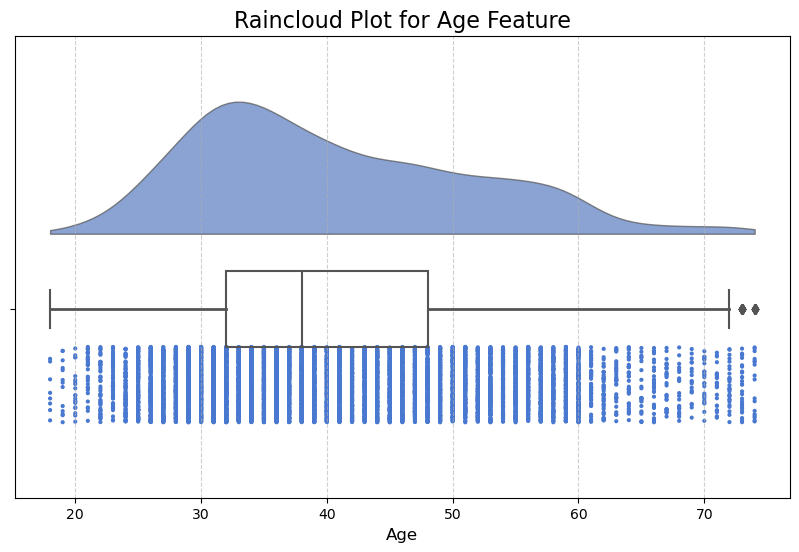

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt  # For raincloud plots

# Assuming `df` is your DataFrame
# Extract the 'age' feature
age_data = df['age']

# Create a Raincloud Plot
plt.figure(figsize=(10, 6))
ax = pt.RainCloud(x=None, y=age_data, orient="h", width_viol=0.7, 
                  width_box=0.2, palette="muted", move=0.2, alpha=0.7)
plt.title("Raincloud Plot for Age Feature", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [24]:
## Lets see if there is any inconsistnent data type 
## 

print(df.dtypes)


## We are gonna iterate over all the features and see if all the observations are of the same type 

for cols in df.columns:
    # for each col, get the type of each observations, and count how many different types in there.
    # if ok, should be 1. Cannot be 0.
    uniques_types = df[cols].apply(type).nunique()
    if uniques_types > 1:
        print(f"This {cols} has mixed data type")
    else:
        print(f"Ok --> {cols} ")
        
        
## there is no inconsistnent data type

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
deposit      object
dtype: object
Ok --> age 
Ok --> job 
Ok --> marital 
Ok --> education 
Ok --> default 
Ok --> balance 
Ok --> housing 
Ok --> loan 
Ok --> contact 
Ok --> day 
Ok --> month 
Ok --> duration 
Ok --> campaign 
Ok --> pdays 
Ok --> previous 
Ok --> deposit 


# Normalizing and standardizing the features.
- Remember that we can only standardize  and Normalize feature that are numeric  

- Age is closer to being a normally distributed data, and I want to preserve the distribution of the data, it does not have that much outlier, so we are not going to use robust scaler. Use z normalization (test) 

- Balance has outliers, and not normally distributed, and this method is less effected by extreme values. So use robust scaler. this is used when the data has outliers and we think that this outlier is necessary. Having outlier degrades the performance of the data.






In [25]:
standard = StandardScaler()
min_max = MinMaxScaler()
robust = RobustScaler()


# z normalization, as the feature is close to normally distributed
df.loc[:, 'age'] = standard.fit_transform(df[['age']])

# robust scaling
df.loc[:, 'balance'] = robust.fit_transform(df[['balance']])
df.loc[:, 'campaign'] = robust.fit_transform(df[['campaign']])

# For transformations
df.loc[:, 'duration'] = np.log1p(df['duration'])
df.loc[:, 'pdays'] = np.log1p(df['previous'])



# Feature Engineering 
- Feature selection 
- Feature creation
    

In [26]:
# # using the binary encoder to encode the traget variable

df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})


In [27]:
numeric_cols = df.select_dtypes(include = ['int64', 'float64']).columns

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,1.666484,admin.,married,secondary,no,1.206782,yes,no,cellular,5,may,6.949856,-0.5,0.000000,0,1
3,1.304350,services,married,secondary,no,1.295213,yes,no,cellular,5,may,6.363028,-0.5,0.000000,0,1
4,1.213816,admin.,married,tertiary,no,-0.228723,no,no,cellular,5,may,6.513230,0.0,0.000000,0,1
5,0.127415,management,single,tertiary,no,-0.351064,yes,yes,cellular,5,may,6.333280,0.0,0.000000,0,1
6,1.394883,management,married,tertiary,no,0.200798,yes,yes,cellular,6,may,7.091742,-0.5,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.687386,blue-collar,single,primary,no,-0.350399,yes,no,cellular,20,apr,5.552960,-0.5,0.000000,0,0
11158,-0.144186,services,married,secondary,no,0.136303,no,no,cellular,16,jun,4.430817,1.0,0.000000,0,0
11159,-0.777920,technician,single,secondary,no,-0.331782,no,no,cellular,19,aug,5.056246,0.0,0.000000,0,0
11160,0.217948,technician,married,secondary,no,-0.351064,no,yes,cellular,8,may,2.890372,0.0,1.791759,5,0


In [28]:
# # Create the age group feature with adjusted bins
# df['age_grp'] = pd.cut(df['age'], bins=[0, 30, 60, 100], labels=['young', 'middle_age', 'old'], include_lowest=True)


# # Encode the age group
# cat_ag_gr = [['young', 'middle_age', 'old']]  # Ensure the order matches the pd.cut() labels
# encoder = OrdinalEncoder(categories=cat_ag_gr)
# df['age_grp'] = encoder.fit_transform(df[['age_grp']])

# Create the campaign and contacts features
df['multiple_contacts'] = (df['campaign'] > 1).astype(int)
df['previous_contact'] = (df['previous'] > 0).astype(int)

# Create the job stability feature
stable_jobs = ['management', 'technician', 'admin.']
df['employment_stability'] = df['job'].apply(lambda x: 1 if x in stable_jobs else 0)

# Create the loan affinity feature
df['loan_affinity'] = (df['housing'] == 'yes').astype(int) + (df['loan'] == 'yes').astype(int)

# Display the updated DataFrame
df.info()




<class 'pandas.core.frame.DataFrame'>
Index: 10030 entries, 0 to 11161
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   10030 non-null  float64
 1   job                   10030 non-null  object 
 2   marital               10030 non-null  object 
 3   education             10030 non-null  object 
 4   default               10030 non-null  object 
 5   balance               10030 non-null  float64
 6   housing               10030 non-null  object 
 7   loan                  10030 non-null  object 
 8   contact               10030 non-null  object 
 9   day                   10030 non-null  int64  
 10  month                 10030 non-null  object 
 11  duration              10030 non-null  float64
 12  campaign              10030 non-null  float64
 13  pdays                 10030 non-null  float64
 14  previous              10030 non-null  int64  
 15  deposit               10

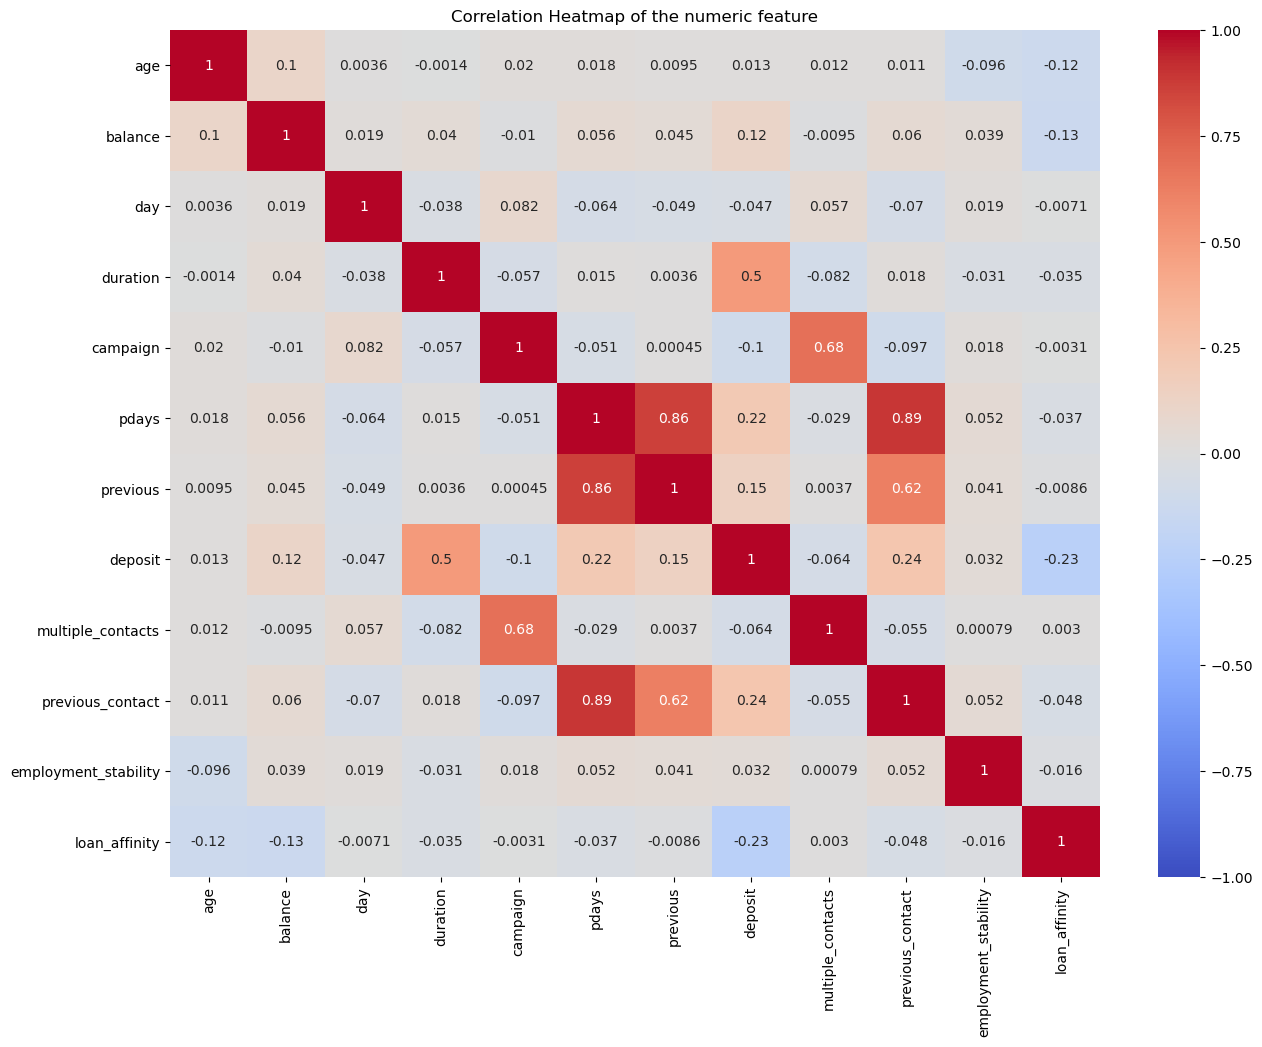

In [29]:


## remember that the target feature is almost balanced, so no need to eorry about it.

## making a correlation graph with the categorical feature.
numeric_cols = df.select_dtypes(include = ['int64', 'float64','int32']).columns
df_n = df[numeric_cols]

corr_matrix = df_n.corr()
plt.figure(figsize=(15, 11))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Heatmap of the numeric feature')
plt.show()

In [30]:
# plot a graph between deposit and duration.

In [31]:
## lets get the categorical feature 
cat_feat = df.select_dtypes(include = ['object'] ).columns
cat_feat 



Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month'],
      dtype='object')

In [32]:
# # day and age are not much correlated, so we are going to remove the numeric features it for the sake of increasing performance of the model that
# # benifits from low number of features

# # Create copies of the original DataFrame
# df_x1 = df.copy()
# df_x2 = df.copy()

# # For df1 (CART)
# columns_to_keep_df1 = [col for col in df_x1.columns if col not in [
#     'age_x', 'balance_x', 'campaign_x', 'duration_x', 'pdays_x',
#     'age_grp', 'employment_stability', 'multiple_contacts',
#     'previous_contact', 'loan_affinity'
# ]]
# df1 = df_x1[columns_to_keep_df1]

# # For df2 (Logistic Regression)
# columns_to_keep_df2 = [col for col in df_x2.columns if col not in [
#     'age', 'age_x', 'day', 'employment_stability',
#     'balance', 'campaign', 'duration', 'pdays'
# ]]
# df2 = df_x2[columns_to_keep_df2]

# # Move 'deposit' column to the end for df2 (if needed)
# if 'deposit' in df2.columns:
#     deposit = df2.pop('deposit')
#     df2['deposit'] = deposit

# # Check the info of df1 and df2
# print("Info for df1:")
# df1.info()

# print("\nInfo for df2:")
# df2.info()


cat_feat

# ## Dont use drop to edit column here.


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month'],
      dtype='object')

In [33]:
    ### Encoding each of the categorical feature

    # - get the no of class
    # - specify if it is ordinal or nominal

    # df['job'].unique()
    # job_cat = [['admin.', 'technician', 'services', 'management', 'retired',
    #        'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
    #        'self-employed', 'student']]

    # Initialize the Binary Encoder
    binary_encoder = ce.BinaryEncoder(cols=['job','marital','month'])


    # - moderate, ordinal, --> binary encoding
    # Apply Binary Encoding to the 'job' feature in df
    df = binary_encoder.fit_transform(df)


    ## remember that we have to do all the binary in one go, if we are using the


    # - low, nominal -- binary encoding 

    # -low, ordinal
    ## Appy label encoder
    df['education'] = df['education'].map({'primary': 0, 'secondary': 1, 'tertiary': 2})

    ## 2d binary encoding (low cardinality)
    #default 
    df['default'] = df['default'].map({'no':0, 'yes':1})
    #housing 
    df['housing'] = df['housing'].map({'no':0, 'yes':1})
    #loan
    df['loan'] = df['loan'].map({'no':0, 'yes':1})
    #contact 
    df['contact'] = df['contact'].map({'telephone':0, 'cellular':1})


    #Month: Moderate cardinality ( 12)


    df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10030 entries, 0 to 11161
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   10030 non-null  float64
 1   job_0                 10030 non-null  int64  
 2   job_1                 10030 non-null  int64  
 3   job_2                 10030 non-null  int64  
 4   job_3                 10030 non-null  int64  
 5   marital_0             10030 non-null  int64  
 6   marital_1             10030 non-null  int64  
 7   education             10030 non-null  int64  
 8   default               10030 non-null  int64  
 9   balance               10030 non-null  float64
 10  housing               10030 non-null  int64  
 11  loan                  10030 non-null  int64  
 12  contact               10030 non-null  int64  
 13  day                   10030 non-null  int64  
 14  month_0               10030 non-null  int64  
 15  month_1               10

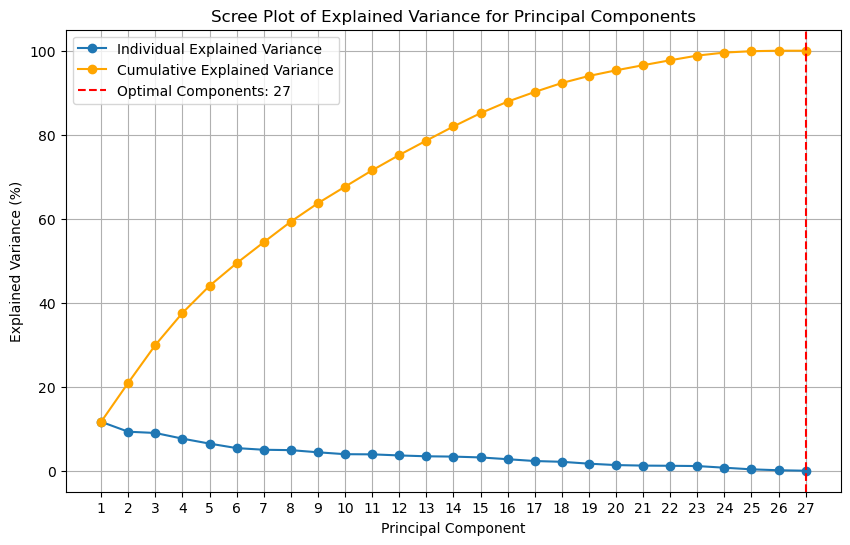

Optimal number of principal components to retain: 27


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

# Assuming df1 is your DataFrame with numeric features only
df_numeric = df.select_dtypes(include=[np.number])

# Scale the numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Number of numeric features
n_components = df_numeric.shape[1]  # This will be the number of numeric columns

# Initialize PCA with the appropriate number of components
pca = PCA(n_components=n_components)
pca_results = pca.fit_transform(scaled_data)

# Calculate explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Use Kneedle to find the "elbow" point in cumulative variance
kneedle = KneeLocator(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, curve='convex', direction='increasing', S= 100)
optimal_components = kneedle.elbow

# Plotting explained variance ratio and cumulative variance

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance * 100, marker='o', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, marker='o', color='orange', label='Cumulative Explained Variance')

# Mark the elbow point on the plot
plt.axvline(x=optimal_components, color='red', linestyle='--', label=f'Optimal Components: {optimal_components}')

plt.title('Scree Plot of Explained Variance for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.legend()
plt.show()

# Print the optimal number of components to retain
print(f"Optimal number of principal components to retain: {optimal_components}")

# End of Data Preprocessing 

In [35]:
# WE will be using only 17 pca, if we use pca 

# Applying Machine Learning
- CART
- K nearest neighbour
- Logistic regression.

In [36]:


# Assuming df1 is your DataFrame and 'target' is the target column
# Replace 'target' with the actual name of your target variable in df1
X = df.drop(columns=['deposit'])  # Features
y = df['deposit']  # Target variable

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 2: Fit and Transform Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))

# Step 3: Fit and Transform Logistic Regression
log_reg = LogisticRegression(max_iter=10000000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Decision Tree Accuracy: 0.7507477567298105
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76       499
           1       0.78      0.70      0.74       504

    accuracy                           0.75      1003
   macro avg       0.75      0.75      0.75      1003
weighted avg       0.75      0.75      0.75      1003

Logistic Regression Accuracy: 0.80259222333001
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80       499
           1       0.81      0.80      0.80       504

    accuracy                           0.80      1003
   macro avg       0.80      0.80      0.80      1003
weighted avg       0.80      0.80      0.80      1003



In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Split the features and target variable
X = df.drop(columns=['deposit'])  # Features
y = df['deposit']  # Target variable

# Step 1: Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree_test = decision_tree.predict(X_test)

# Evaluate Decision Tree on Test Set
print("Decision Tree Accuracy (Test):", accuracy_score(y_test, y_pred_tree_test))
print("Decision Tree Classification Report (Test):\n", classification_report(y_test, y_pred_tree_test))

# 10-Fold Cross-Validation for Decision Tree
cv_scores_tree = cross_val_score(decision_tree, X_train, y_train, cv=10, scoring='accuracy')
print("Decision Tree 10-Fold Cross-Validation Mean Accuracy:", cv_scores_tree.mean())
print("Decision Tree 10-Fold Cross-Validation Standard Deviation:", cv_scores_tree.std())

print("-------------------------------------------------------------------------------")
# Step 3: Logistic Regression
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg_test = log_reg.predict(X_test)

# Evaluate Logistic Regression on Test Set
print("Logistic Regression Accuracy (Test):", accuracy_score(y_test, y_pred_log_reg_test))
print("Logistic Regression Classification Report (Test):\n", classification_report(y_test, y_pred_log_reg_test))

# 10-Fold Cross-Validation for Logistic Regression
cv_scores_log_reg = cross_val_score(log_reg, X_train, y_train, cv=10, scoring='accuracy')
print("Logistic Regression 10-Fold Cross-Validation Mean Accuracy:", cv_scores_log_reg.mean())
print("Logistic Regression 10-Fold Cross-Validation Standard Deviation:", cv_scores_log_reg.std())


Decision Tree Accuracy (Test): 0.7587238285144566
Decision Tree Classification Report (Test):
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      1045
           1       0.76      0.73      0.74       961

    accuracy                           0.76      2006
   macro avg       0.76      0.76      0.76      2006
weighted avg       0.76      0.76      0.76      2006

Decision Tree 10-Fold Cross-Validation Mean Accuracy: 0.7637105865473302
Decision Tree 10-Fold Cross-Validation Standard Deviation: 0.009823229923018654
-------------------------------------------------------------------------------
Logistic Regression Accuracy (Test): 0.7856430707876371
Logistic Regression Classification Report (Test):
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1045
           1       0.78      0.78      0.78       961

    accuracy                           0.79      2006
   macro avg       0

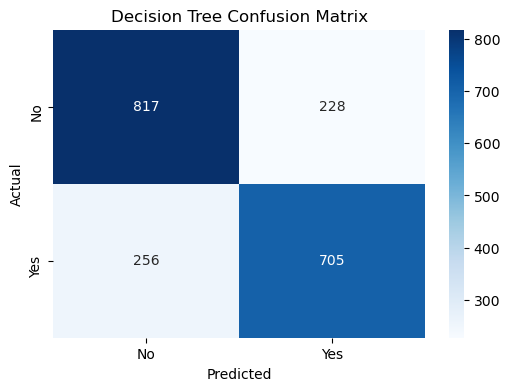

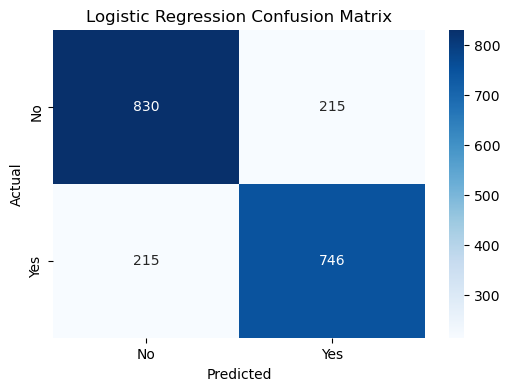

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree_test)

# Plotting the confusion matrix for Decision Tree
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg_test)

# Plotting the confusion matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


c:\Users\nafee\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nafee\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nafee\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nafee\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

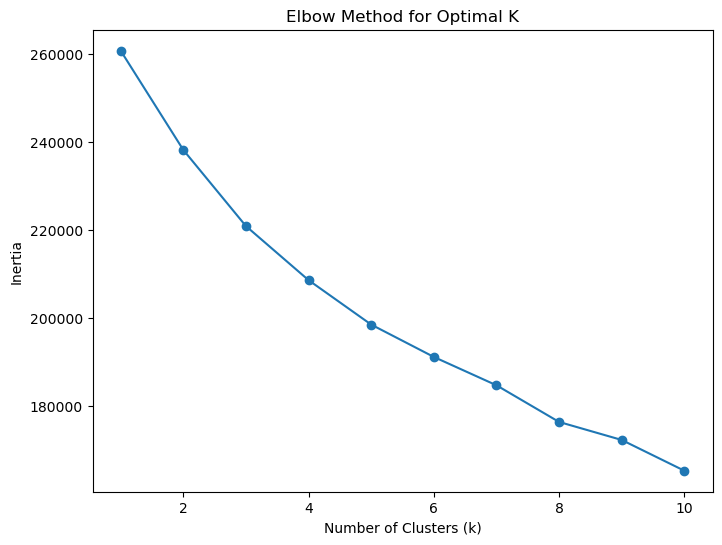

c:\Users\nafee\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


        age  job_0  job_1  job_2  job_3  marital_0  marital_1  education  \
0  1.666484      0      0      0      1          0          1          1   
3  1.304350      0      0      1      0          0          1          1   
4  1.213816      0      0      0      1          0          1          2   
5  0.127415      0      0      1      1          1          0          2   
6  1.394883      0      0      1      1          0          1          2   

   default   balance  ...  duration  campaign  pdays  previous  deposit  \
0        0  1.206782  ...  6.949856      -0.5    0.0         0        1   
3        0  1.295213  ...  6.363028      -0.5    0.0         0        1   
4        0 -0.228723  ...  6.513230       0.0    0.0         0        1   
5        0 -0.351064  ...  6.333280       0.0    0.0         0        1   
6        0  0.200798  ...  7.091742      -0.5    0.0         0        1   

   multiple_contacts  previous_contact  employment_stability  loan_affinity  \
0            

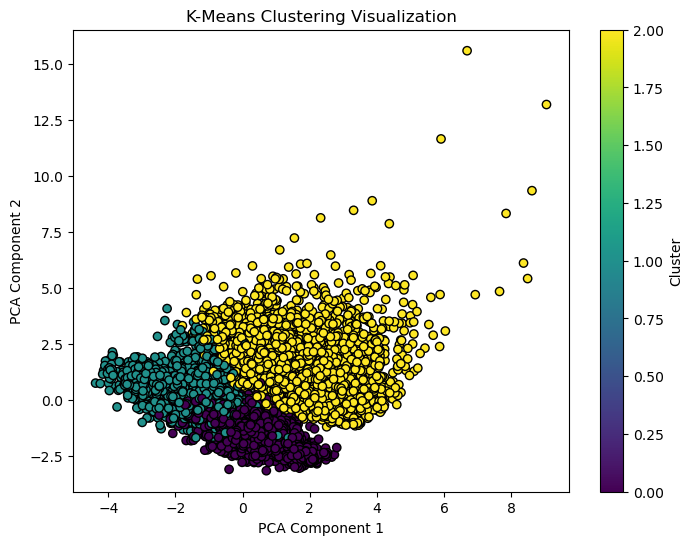

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Select features for clustering (excluding 'deposit' or any target column)
X = df.drop(columns=['deposit'])

# Step 2: Standardize the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Step 4: Apply K-Means with the optimal number of clusters (assume k=3 for example)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 5: Add the cluster labels to the DataFrame
df['cluster'] = clusters

# Display the first few rows with the cluster column
print(df.head())

# Step 6 (Optional): Visualize the clusters (if dataset is 2D or reduced to 2D using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [40]:
## Model selection. 

# Outcome = Categorical
# Size = Small to medium , <10,000. use Use large dataset too to see if they preform any better
# the outcome is categorical, so cannot see if the relationship is linear or not, not possible.



## how to indentify if a feature is continuos or not ? 
# - the data type of the feature is often float64, int64. sometimes panda might mis-identify them as object, just check.
# - High number of unique values, like close to no of records.
# - There is a smooth distribution, normal/skewed/uniform, no gap between bars. Categorical shows less bars.
# - high range+ many distinc values, continuos. Categorical have very few distinct values.
# - have mean/median/std/percentile. 




# cont_feat = df_c[['age', 'balance', 'duration', 'campaign']]

# for x_feature in cont_feat.columns:
#     for y_feature in cont_feat.columns:
#         if x_feature != y_feature:
#             plt.figure(figsize=(8, 6))
#             r, _ = stats.pearsonr(df_c[x_feature], df_c[y_feature])
#             print(r, _)
#             sns.scatterplot(data=df_c, x=x_feature, y=y_feature, alpha=0.5)
#             sns.regplot(data=df_c, x=x_feature, y=y_feature, scatter=False, color='orange', line_kws={'label':'Linear Fit'})
#             sns.regplot(data=df_c, x=x_feature, y=y_feature, scatter=False, order=2, color='green', line_kws={'label':'Polynomial Fit (Degree 2)'})
#             plt.title(f"Relationship between {x_feature} and {y_feature}")
#             plt.xlabel(x_feature)
#             plt.ylabel(y_feature)
#             plt.legend()
#             plt.show()

In [41]:
# # we see that between all the continuos features, there is not that strong relationship. there is very very weak r,
# # That means no linear relationship at all. 

# # that means non linear relationship

# # and most of the features are categorical 
# # just use all the classification models


# model_logr = LogisticRegression(max_iter=10000)
# model_logr.fit(X_train, y_train) # train the model, learn to map
# result_logr = model_logr.score(X_test, y_test)


# model_dt = DecisionTreeClassifier() 
# model_dt.fit(X_train, y_train) 
# result_dt = model_dt.score(X_test, y_test)


# result_logr, result_dt



<!-- For the decision tree, we see that both of the result, with train-test and with CV are same. This means there is no overfitting or underfitting. The model seems to generalize well across multiple subsets, as it performs consistently. However, this doesn’t necessarily mean the model is producing highly accurate predictions—only that its performance is stable across different test splits.

we can see that the accuracy of logistic regression is much more with train and test split compared to 
CV sets. this means that the model is overfitting to the train-test split, an now it cannot generalize 
much with the 5 validation sets. the result with the cv is realistic. -->



In [44]:
## Using Hyper-parameter tuning for the decision tree
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' :[5,6,7,8],
    'min_samples_split':[3,4,5],
    'min_samples_leaf':[12,13,14,15]
}

gr_src_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=10)
gr_src_cv.fit(X, y)
print("Best Parameter:", gr_src_cv.best_params_)
print("Best CV score:", gr_src_cv.best_score_)

Best Parameter: {'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 3}
Best CV score: 0.7788634097706879


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameters for Decision Tree
best_params = {'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 3}

# Step 1: Decision Tree with the best hyperparameters
decision_tree_best = DecisionTreeClassifier(random_state=42, **best_params)

# Fit the model on the training set
decision_tree_best.fit(X_train, y_train)

# Step 2: Evaluate Decision Tree on Test Set
y_pred_tree_best = decision_tree_best.predict(X_test)
print("Decision Tree Accuracy (Test):", accuracy_score(y_test, y_pred_tree_best))
print("Decision Tree Classification Report (Test):\n", classification_report(y_test, y_pred_tree_best))

# Step 3: Cross-Validation for Decision Tree with the best hyperparameters
cv_scores_tree_best = cross_val_score(decision_tree_best, X_train, y_train, cv=10, scoring='accuracy')
print("Decision Tree 10-Fold Cross-Validation Mean Accuracy:", cv_scores_tree_best.mean())
print("Decision Tree 10-Fold Cross-Validation Standard Deviation:", cv_scores_tree_best.std())


Decision Tree Accuracy (Test): 0.7986041874376869
Decision Tree Classification Report (Test):
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1045
           1       0.78      0.80      0.79       961

    accuracy                           0.80      2006
   macro avg       0.80      0.80      0.80      2006
weighted avg       0.80      0.80      0.80      2006

Decision Tree 10-Fold Cross-Validation Mean Accuracy: 0.8052092682366313
Decision Tree 10-Fold Cross-Validation Standard Deviation: 0.009146863978327997


In [43]:
# Using random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model with parameters
# You may want to adjust n_estimators (number of trees) and max_depth based on tuning
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Use 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # `X` is your feature set and `y` is the target variable

# Calculate and print the mean and standard deviation of cross-validation scores
print("Cross-Validation Accuracy: {:.2f}%".format(cv_scores.mean() * 100))
print("Standard Deviation of CV Accuracy: {:.2f}%".format(cv_scores.std() * 100))


Cross-Validation Accuracy: 79.13%
Standard Deviation of CV Accuracy: 3.45%
